# Sentiment Analysis in Movie Revie Data
http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

In [1]:
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics

I could not make it work directly, so I am manually importing the files after calling the fetch_data.py program in the data folder associated to movie_review

In [3]:
# the training data folder must be passed as first argument
movie_reviews_data_folder = '../data/movie_reviews/txt_sentoken'
dataset = load_files(movie_reviews_data_folder, shuffle=False)
print("n_samples: %d" % len(dataset.data))

n_samples: 2000


In [11]:
%pprint

Pretty printing has been turned ON


### Example of first review with it's label 

In [12]:
print(dataset.data[0])

b'plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it\'s simply too jumbled . \nit starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience memb

In [14]:
print(dataset.target_names[dataset.target[0]])

neg


##### Using train_test_split is very convenient for splitting the dataset

In [16]:
# split the dataset in training and test set:
docs_train, docs_test, y_train, y_test = train_test_split(dataset.data,
                                                          dataset.target,
                                                          test_size=0.25,
                                                          random_state=None)

##### min_df -> How many words should be in all documents for word to be considered, while max_df is removing words above 95 pctile.

In [20]:
# TASK: Build a vectorizer / classifier pipeline that filters out tokens that are too rare or too frequent
tfid_vectorizer = TfidfVectorizer(analyzer='word', min_df=3, max_df=0.95)
clf_text = Pipeline([
    ('vect', tfid_vectorizer),
    ('clf', LinearSVC())
])

clf = clf_text.fit(docs_train, y_train)

In [21]:
clf.steps

[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
          dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
          lowercase=True, max_df=0.95, max_features=None, min_df=3,
          ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
          stop_words=None, strip_accents=None, sublinear_tf=False,
          token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
          vocabulary=None)),
 ('clf', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
       intercept_scaling=1, loss='squared_hinge', max_iter=1000,
       multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
       verbose=0))]

##### This is the prediction from the pipeline above

In [24]:
predicted = clf.predict(docs_test)

In [32]:
print(metrics.classification_report(y_test, predicted, target_names=['negative', 'positive']))

             precision    recall  f1-score   support

   negative       0.85      0.84      0.84       242
   positive       0.85      0.86      0.85       258

avg / total       0.85      0.85      0.85       500



##### Somethig that took me some time to understand: the keys of the dict should be the object name as described in the pipeline (ex. vect for vectorizer) followed by two underscores and then the parameter name of the function.

In [40]:
# TASK: Build a grid search to find out whether unigrams or bigrams are more useful.
# Fit the pipeline on the training set using grid search for the parameters
parameters = {'vect__ngram_range' : [(1,1), (1,2)]}
clf_GS = GridSearchCV(clf, parameters, n_jobs=-1)
_ = clf_GS.fit(docs_train, y_train)

In [44]:
# TASK: print the cross-validated scores for the each parameters set
    # explored by the grid search
import pandas as pd 
pd.DataFrame(clf_GS.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_vect__ngram_range,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,1.552066,0.843414,0.827333,1.0,"(1, 1)","{'vect__ngram_range': (1, 1)}",2,0.844311,1.0,0.806,1.0,0.831663,1.0,0.006051,0.018216,0.015944,0.0
1,5.755968,1.867340,0.849333,1.0,"(1, 2)","{'vect__ngram_range': (1, 2)}",1,0.868263,1.0,0.836,1.0,0.843687,1.0,0.173798,0.267096,0.013768,0.0


In [45]:
# TASK: Predict the outcome on the testing set and store it in a variabl named y_predicted
y_predicted = clf_GS.predict(docs_test)

In [46]:
# Print the classification report
print(metrics.classification_report(y_test, y_predicted, target_names=dataset.target_names))

             precision    recall  f1-score   support

        neg       0.84      0.83      0.84       242
        pos       0.85      0.85      0.85       258

avg / total       0.84      0.84      0.84       500



In [47]:
# Print and plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

[[202  40]
 [ 38 220]]


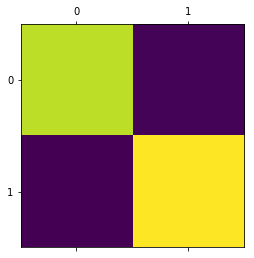

In [48]:
import matplotlib.pyplot as plt
plt.matshow(cm)
plt.show()